In [ ]:
import pandas as pd  
df = pd.read_csv("thegurus-opendata-renfe-trips.csv", nrows=100)
print(df.head())  

   id company  origin destination            departure              arrival  \
0   1   renfe  MADRID   BARCELONA  2019-04-18 05:50:00  2019-04-18 08:55:00   
1   2   renfe  MADRID   BARCELONA  2019-04-18 13:25:00  2019-04-18 16:24:00   
2   3   renfe  MADRID   BARCELONA  2019-04-18 06:30:00  2019-04-18 09:20:00   
3   4   renfe  MADRID   BARCELONA  2019-04-18 15:30:00  2019-04-18 18:40:00   
4   5   renfe  MADRID   BARCELONA  2019-04-18 07:00:00  2019-04-18 09:30:00   

   duration vehicle_type vehicle_class   price      fare  seats meta  \
0      3.08          AVE    Preferente   68.95     Promo    NaN   {}   
1      2.98      AVE-TGV       Turista  107.70  Flexible    NaN   {}   
2      2.83          AVE       Turista   75.40     Promo    NaN   {}   
3      3.17          AVE    Preferente     NaN     Promo    NaN   {}   
4      2.50          AVE  Turista Plus  106.75     Promo    NaN   {}   

           insert_date  
0  2019-04-11 21:49:46  
1  2019-04-11 21:49:46  
2  2019-04-11 21:

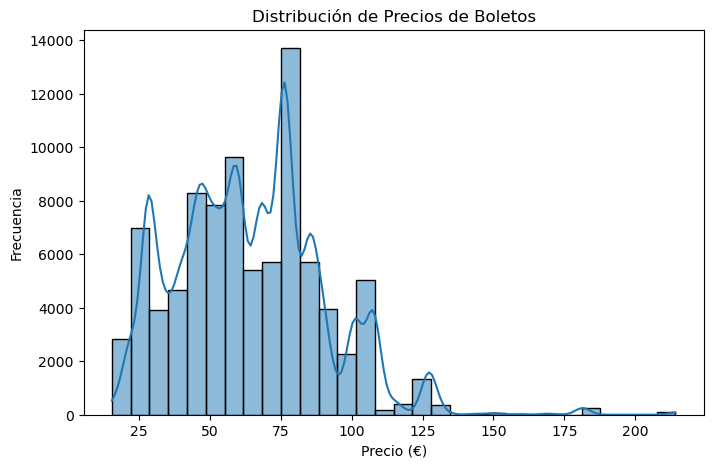

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("thegurus-opendata-renfe-trips.csv", usecols=['price'], nrows=100000)

df = df.dropna(subset=['price'])

plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribución de Precios de Boletos")
plt.xlabel("Precio (€)")
plt.ylabel("Frecuencia")
plt.show()


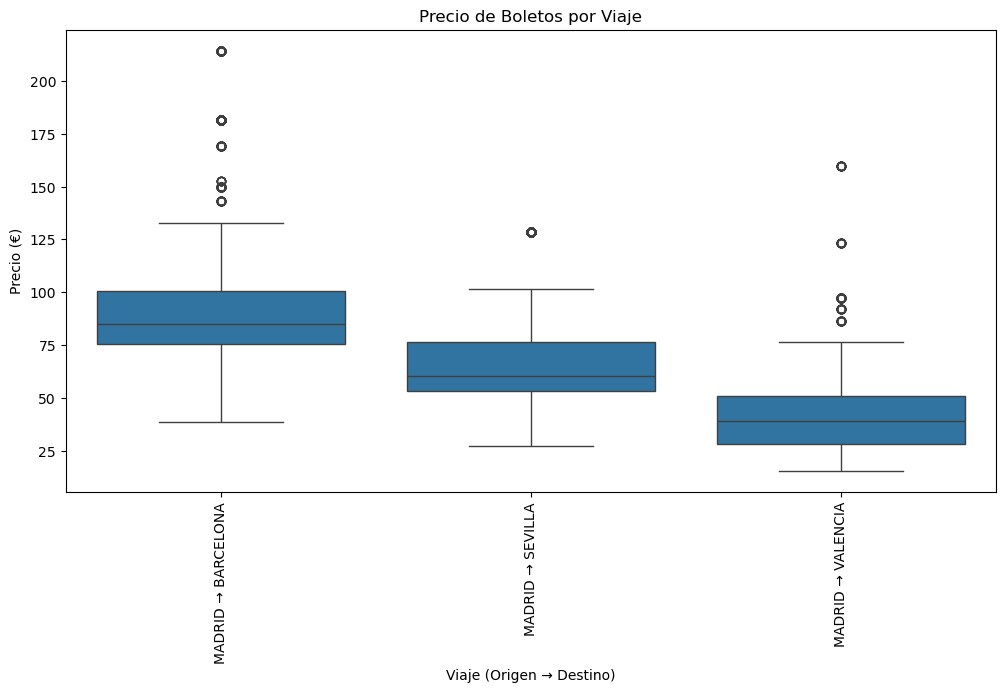

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("thegurus-opendata-renfe-trips.csv", usecols=['origin', 'destination', 'price'], nrows=100000)
df = df.dropna(subset=['price'])

df['trip'] = df['origin'] + " → " + df['destination']

plt.figure(figsize=(12,6))
sns.boxplot(x='trip', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Precio de Boletos por Viaje")
plt.xlabel("Viaje (Origen → Destino)")
plt.ylabel("Precio (€)")
plt.show()

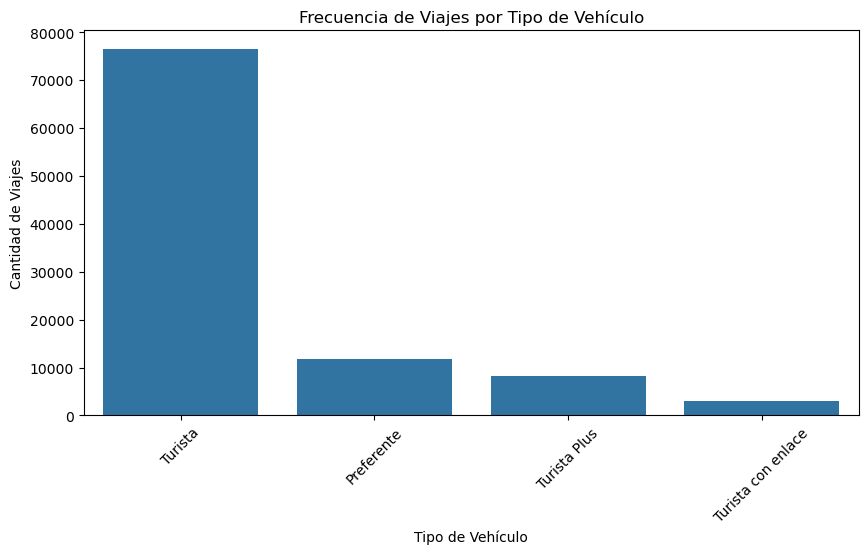

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("thegurus-opendata-renfe-trips.csv", usecols=['vehicle_class'], nrows=100000)

plt.figure(figsize=(10,5))
sns.countplot(x='vehicle_class', data=df, order=df['vehicle_class'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Frecuencia de Viajes por Tipo de Vehículo")
plt.xlabel("Tipo de Vehículo")
plt.ylabel("Cantidad de Viajes")
plt.show()


c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


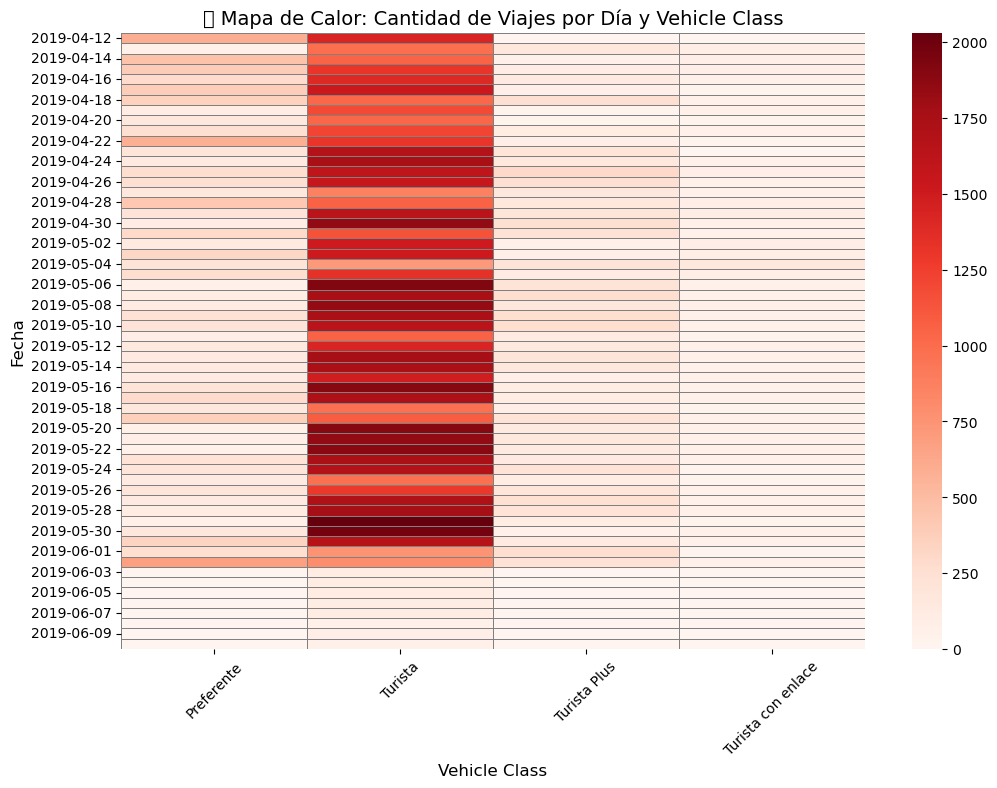

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("thegurus-opendata-renfe-trips.csv", usecols=['departure', 'vehicle_class'], nrows=100000)

df['departure'] = pd.to_datetime(df['departure']).dt.date

df_grouped = df.groupby(['departure', 'vehicle_class']).size().reset_index(name='count')

df_pivot = df_grouped.pivot(index='departure', columns='vehicle_class', values='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap="Reds", linewidths=0.5, linecolor="gray")

plt.title("Mapa de Calor: Cantidad de Viajes por Día y Vehicle Class", fontsize=14)
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("Fecha", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


c:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


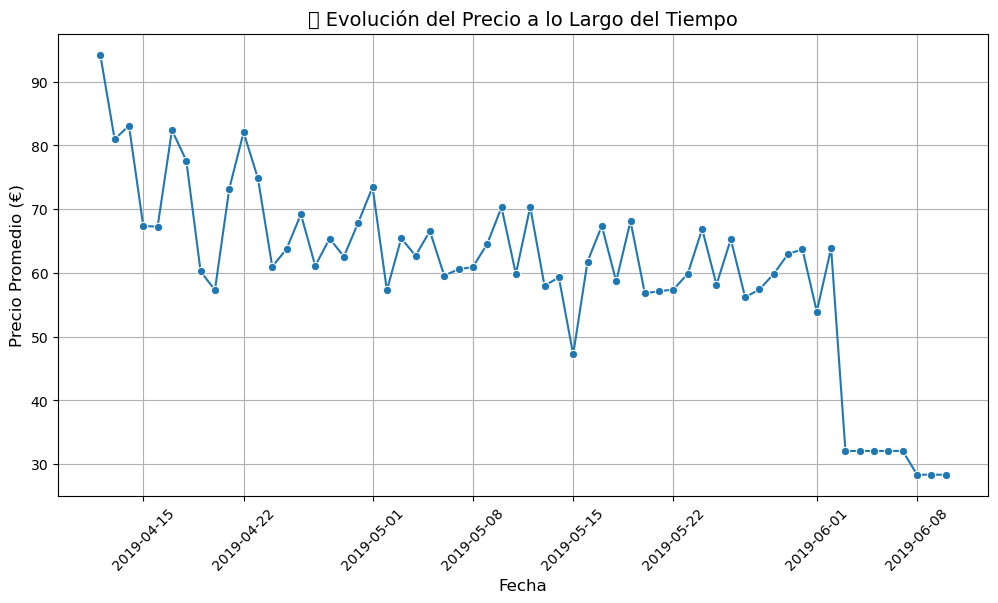

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("thegurus-opendata-renfe-trips.csv", usecols=['departure', 'price'], nrows=100000)

df = df.dropna()

df['departure'] = pd.to_datetime(df['departure'])

df_grouped = df.groupby(df['departure'].dt.date)['price'].mean().sort_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_grouped.index, y=df_grouped.values, marker="o", linestyle="-")

plt.xticks(rotation=45)
plt.title("Evolución del Precio a lo Largo del Tiempo", fontsize=14)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio Promedio (€)", fontsize=12)
plt.grid(True)

# Mostrar gráfico
plt.show()
